### Auto-Generated Code Cells

The following code cells contain code from external .py files that has been automatically added to remove these dependencies. This allows you to run this version of the SELENE notebook on Cloud platforms such as Google Colab. Run all following code cells before starting with the actual notebook content. 

Most Cloud platforms such as Google Colab have a wide range of Python packages preinstalled. However, if any import statements in the following code cells throws an error because of a missing package, you can create and run a new code cell to install the missing package using the `pip` command as shown here:
```
!pip install <package-name>
```

You can use the code cell below for convenience.

In [ ]:
#!pip install <package-name>

In [ ]:
# === Inline content for module src.text.vectorizing.vocab  ==

# === Inlined imports ===
import numpy as np
from collections import Counter
from tqdm import tqdm

# === Embedded configs ===


# === Inlined definitions ===
def __init__(self, vocab):
    self.vocab = vocab

def encode(self, tokens: list[str]):
    return np.asarray([self.token2index[t] if t in self.token2index else self.default_index for t in tokens])

class Vocabulary:

    def __init__(self, tokens, special_tokens: list=[], token_counts=None):
        self.index2token = special_tokens + tokens
        self.token2index = {token: index for index, token in enumerate(self.index2token)}
        if token_counts is not None:
            self.token_counts = np.array([token_counts.get(token, 0) for token in self.index2token])
        self.default_index = -1

    def set_default_index(self, default_index: int):
        if default_index >= len(self.index2token):
            raise Exception('Invalid default index.')
        self.default_index = default_index

    def encode(self, tokens: list[str]):
        return np.asarray([self.token2index[t] if t in self.token2index else self.default_index for t in tokens])

    def decode(self, indices: list[int], default_token='[???]'):
        return [self.index2token[i] if int(i) < len(self.index2token) else default_token for i in indices]

    def __getitem__(self, token: str):
        return self.token2index[token]

    def __len__(self):
        return len(self.index2token)

def set_default_index(self, default_index: int):
    if default_index >= len(self.index2token):
        raise Exception('Invalid default index.')
    self.default_index = default_index

def decode(self, indices: list[int], default_token='[???]'):
    return [self.index2token[i] if int(i) < len(self.index2token) else default_token for i in indices]

In [ ]:
# === Inline content for module src.utils.data.files  ==

# === Inlined imports ===
import bz2
import os, re, yaml
import requests
import zipfile, tarfile
from tqdm import tqdm

# === Embedded configs ===
CONFIG = yaml.safe_load("""urls:
  downloads:
    notebooks: "https://github.com/chrisvdweth/selene/tree/master/notebooks"
    datasets: "https://chrisvdw.net/projects/selene/downloads/datasets/"
    models: "https://chrisvdw.net/projects/selene/downloads/models/"
    """)

# === Inlined definitions ===
def download_dataset(dataset_path, base_url=None, download_path=None, overwrite=False, ignore_html=True):
    if base_url is None:
        base_url = CONFIG['urls']['downloads']['datasets']
    if download_path is None:
        download_path = 'data/datasets/' + '/'.join(dataset_path.split('/')[0:-1]) + '/'
    url = base_url + dataset_path
    return download_file(url, download_path=download_path, overwrite=overwrite, ignore_html=ignore_html)

def download_file(url, download_path, overwrite=False, ignore_html=False):
    file_name = url.split('/')[-1]
    create_folder(download_path)
    file_path = download_path + file_name
    if os.path.isfile(file_path) == True and overwrite is not True:
        print(f"File '{file_path}' already exists (use 'overwrite=True' to overwrite it).")
        return (file_path, download_path)
    response = requests.get(url, stream=True)
    total_size_in_bytes = int(response.headers.get('content-length', 0))
    block_size = 1024
    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)
    with open(file_path, 'wb') as file:
        for data in response.iter_content(block_size):
            if ignore_html is True and is_html_file(data) is True:
                print('Error downloading file (expected data file, got HTML file)')
                return (None, None)
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()
    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print('Error downloading file (source does not exist)')
        return (None, None)
    return (file_path, download_path)

def create_folder(folder_name, exist_ok=True):
    try:
        os.makedirs(folder_name, exist_ok=exist_ok)
        return folder_name
    except:
        return None

def is_html_file(content):
    content = content.decode('utf-8', 'ignore').strip().lower()
    if content.startswith('<!doctype html') is True:
        return True
    elif content.startswith('<html') is True:
        return True
    return False

def decompress_file(file_name, target_path='.', overwrite=False):
    file_list = []
    if file_name.lower().endswith('zip'):
        with zipfile.ZipFile(file_name, 'r') as zip_file:
            for member in zip_file.namelist():
                extracted_path = zip_file.extract(member, path=target_path)
                file_list.append(extracted_path)
        return file_list
    elif file_name.lower().endswith('tar.gz'):
        tar = tarfile.open(file_name, 'r:gz')
        tar.extractall(path=target_path)
        tar.close()
        return None
    elif file_name.lower().endswith('tar'):
        tar = tarfile.open(file_name, 'r:')
        tar.extractall(path=target_path)
        tar.close()
        return None
    elif file_name.lower().endswith('bz2'):
        output_file_name = target_path + file_name.split('/')[-1]
        output_file_name = re.sub('.bz2', '', output_file_name, flags=re.I)
        if os.path.isfile(output_file_name) == True and overwrite is not True:
            print('File "{}" already exists.'.format(output_file_name))
            return output_file_name
        with open(output_file_name, 'wb') as output_file, bz2.BZ2File(file_name, 'rb') as file:
            for data in iter(lambda: file.read(100 * 1024), b''):
                output_file.write(data)
        return output_file_name

In [ ]:
# === Inline content for module src.utils.plotting.nn  ==

# === Inlined imports ===
import numpy as np
import matplotlib.pyplot as plt

# === Embedded configs ===


# === Inlined definitions ===
def plot_training_results(results, legend, normalize=True, fontsize=14):
    results = np.asarray(results)
    plt.figure()
    x = list(range(1, len(results) + 1))
    for idx in range(results.shape[1]):
        y = results[:, idx]
        if normalize == True and np.max(y) > 1:
            y = y / np.max(y)
        plt.plot(x, y, lw=3)
    plt.gca().set_xticks(x)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.xlabel('Epoch', fontsize=fontsize)
    plt.legend(legend, loc='lower left', fontsize=fontsize)
    plt.tight_layout()
    plt.show()

In [ ]:
# === Inline content for module src.utils.compute.gpu  ==

# === Inlined imports ===
import random
import torch

# === Embedded configs ===


# === Inlined definitions ===
def select_device(force_cpu=False, required_memory_gb=None):
    if force_cpu == True:
        return torch.device('cpu')
    candidate_gpus = []
    for i in range(torch.cuda.device_count()):
        free, total = torch.cuda.mem_get_info(device=i)
        if required_memory_gb is None or free / (1024 * 1024 * 1024) > required_memory_gb:
            candidate_gpus.append((i, free))
    if len(candidate_gpus) == 0:
        return torch.device('cpu')
    else:
        device = torch.cuda.device(random.choice(candidate_gpus)[0])
        return torch.device(f'cuda:{device.idx}')

<img src="https://raw.githubusercontent.com/chrisvdweth/selene/refs/heads/master/notebooks/images/logo/selene-logo-640.png" style="max-height:75px;" alt="SELENE Logo" />

**Disclaimer:** This Jupyter Notebook contains content generated with the assistance of AI. While every effort has been made to review and validate the outputs, users should independently verify critical information before relying on it. The SELENE notebook repository is constantly evolving. We recommend downloading or pulling the latest version of this notebook from Github.

# Machine Translation with Transformers

In this notebook, we will build and train a machine translation model using the Transformer architecture **entirely from scratch**, using **only PyTorch** and Python's standard libraries. Rather than relying on high-level frameworks or pre-built models, we will implement each component step by step &mdash; from data preprocessing and tokenization, to positional encodings, multi-head attention, encoder–decoder blocks, and finally the training loop itself. This hands-on approach allows us to deeply understand how modern sequence-to-sequence neural models operate internally.

The goal of this notebook is **not** to develop a state-of-the-art machine translation system. Instead, the focus is on **maximizing the learning experience** by exposing every detail of the modeling and training process. For this reason, we intentionally work with a relatively simple dataset: pairs of image captions drawn from a multilingual captioning corpus. Although these captions are short and limited in vocabulary, they provide a clean and practical setting in which we can explore the mechanics of training a translation model without the heavy computational and engineering overhead of industrial-scale datasets.

By training the model on this small dataset, we will walk through all stages of the workflow: preparing batches, constructing masks, defining the loss function, computing gradients, and monitoring training progress. While the final model will not match the accuracy of large pretrained systems, the experience of constructing it piece by piece lays the foundation for understanding more advanced techniques and applying them confidently in real-world scenarios.

### Setting up the Notebook

#### Make Required Imports

This notebook requires the import of different Python packages but also additional Python modules that are part of the repository. If a package is missing, use your preferred package manager (e.g., [conda](https://anaconda.org/anaconda/conda) or [pip](https://pypi.org/project/pip/)) to install it. If the code cell below runs with any errors, all required packages and modules have successfully been imported.

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import torch
from torch import Tensor
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence


We use spaCy for tokenizing captions. Note that we need $2$ tokenizers since we are dealing with $2$ different languages.

In [2]:
import spacy

SRC_LANGUAGE = 'DE'
TGT_LANGUAGE = 'EN'

nlp = {
    SRC_LANGUAGE: spacy.blank(SRC_LANGUAGE),
    TGT_LANGUAGE: spacy.blank(TGT_LANGUAGE)
}

In [3]:
multi30k_zip, target_path = download_dataset("text/corpora/translation/multi30k-de-en.zip")

File 'data/datasets/text/corpora/translation/multi30k-de-en.zip' already exists (use 'overwrite=True' to overwrite it).


We also need to decompress the archive file.

In [4]:
multi30k = decompress_file(multi30k_zip, target_path=target_path)

print(multi30k)

['data/datasets/text/corpora/translation/multi30k-de-en.csv']


#### Checking & Setting Computing Device

PyTorch allows to train neural networks on supported GPU to significantly speed up the training process. If you have a support GPU, feel free to utilize it. However, for this notebook it's certainly not needed as our dataset is small and our network model is very simple. We provide an auxiliary method to automatically select the best device. It checks if a supported GPU is available and if so, uses it as the preferred device.

In [5]:
# Select preferred device (GPU, if available; CPU otherwise); you can enfore the use of the CPU
DEVICE = select_device(force_cpu=False)

print("Available device: {}".format(DEVICE))

Available device: cuda:0


#### Preliminaries

Before checking out this notebook, please consider the following:

* This notebook uses a rather simple and small dataset containing German and English image captions for the training, as the purpose is not to train a state-of-the-art model. All the data fits into memory, so no more sophisticated data handling strategies are needed.

* We purposefully avoid the use of any specialized libraries and use only classes and methods provided by Python (or other Python standard libraries).

---

## Dataset Preparation

In this notebook, we use a simplified version of the [**Multi30k Dataset**](https://github.com/multi30k/dataset). This dataset is a multilingual extension of the Flickr30k image-caption corpus, designed primarily for research in **multimodal and multilingual machine translation**. It contains tens of thousands of images paired with captions in multiple languages, most notably **English, German, and French**. The original Flickr30k dataset provides 31,014 images, each with five descriptive English captions. Multi30k builds on this by adding professionally translated captions, independently written descriptions, and other language variations, making it a rich resource for studying how visual information and multilingual text interact.

Although Multi30k is a **multimodal** dataset, it can be used very effectively for **text-only machine translation** because it provides high-quality parallel caption pairs &mdash; most commonly English $\leftrightarrow$ German and, in extended versions, English $\leftrightarrow$ French. Each image in the dataset comes with professionally translated captions as well as independently written descriptions in other languages. For text-only translation models, we can simply **ignore the images** and treat the caption pairs as a standard parallel corpus: each English caption becomes a source sentence, and its German (or French) counterpart becomes the target, or vice versa. 

Image captions are generally **short, concrete, and descriptive**, which makes them easier to translate than broad, open-domain text. Captions typically focus on visible, literal content &mdash; objects, people, actions, colors, and settings &mdash; rather than abstract concepts or nuanced reasoning. Because of this, they contain fewer idioms, cultural references, or domain-specific terminology that might require specialized knowledge. Their sentence structures also tend to be simple and predictable, often following straightforward patterns like *"A man riding a bike"* or *"Two dogs playing in the park"*, which reduces grammatical ambiguity. This makes this dataset very suitable for our purpose here.

### Loading Data from File

For ease of use, we provide a simplified version of the Multi30k dataset which has already all images removed and only contains the English and German captions, all contained in a single `.csv` file. Let's load this file into a pandas DataFrame and look at the first view rows.

In [6]:
df = pd.read_csv(multi30k[0])

df.head()

,PART,DE,EN
0,TRAIN,Zwei junge weiße Männer sind im Freien in der ...,"Two young, White males are outside near many b..."
1,TRAIN,Mehrere Männer mit Schutzhelmen bedienen ein A...,Several men in hard hats are operating a giant...
2,TRAIN,Ein kleines Mädchen klettert in ein Spielhaus ...,A little girl climbing into a wooden playhouse.
3,TRAIN,Ein Mann in einem blauen Hemd steht auf einer ...,A man in a blue shirt is standing on a ladder ...
4,TRAIN,Zwei Männer stehen am Herd und bereiten Essen zu.,Two men are at the stove preparing food.


Apart from the German captions (Column `DE`) and the corresponding English captions (Column `EN`), the DataFrame also has a Column `PART` which indicates if the caption pairs are part of the training, validation, or test set. We can use this information to create separate DataFrames for the training, validation, and test captions.

In [7]:
df_train = df[(df["PART"] == "TRAIN")]
df_test  = df[(df["PART"] == "TEST")]
df_val   = df[(df["PART"] == "VAL")]

print(f"Size of training set: {len(df_train)}")
print(f"Size of validation set: {len(df_val)}")
print(f"Size of test set: {len(df_test)}")

Size of training set: 29000
Size of validation set: 1014
Size of test set: 1000


### Create Vocabularies

We first need to create the **two vocabularies** for our source and target language. Neural networks operate on numerical representations**, not raw text, so a vocabulary is needed to map words or subword units to integer IDs that the model can process. The vocabulary defines the set of tokens (i.e., words, punctuation marks) and ensures that each symbol is consistently associated with a numerical index &mdash; which is then later used to lookup the word embeddings that eventually form the input to the neural network. Without a vocabulary, the model would have no systematic way to convert text into a numeric format suitable for computation.

A well-designed vocabulary is also crucial for controlling the model's **capacity, generalization, and efficiency**. If the vocabulary is too large, the embedding matrix and output layer become huge, slowing down training and increasing memory requirements. If it's too small, the model must represent many rare words with generic or overly fragmented subword units, which can harm translation quality or language understanding. Vocabularies are therefore often created based on subword-based tokenization methods (e.g., Byte-Pair Encoding, WordPiece) to strike a balance between expressiveness and efficiency.

However, since captions are typically short, simple, and typically follow straightforward patterns, using "traditional" word-based tokenization works perfectly fine here. This has the advantage that we do not need to load pretrained subword tokenization models in this notebook. Furthermore, we can ignore any additional considerations such as, for example, removing very rare words to somehow restrict the overall size of both vocabularies.

In short, to create our vocabularies, we simply need to go through all captions in the source and target language, tokenize the caption (here using the spaCy tokenizer) and tokens to a set to get the final sets of unique tokens for both languages. The code cell below implements this step.

In [8]:
tokens = {SRC_LANGUAGE: set(), TGT_LANGUAGE: set()}

for index, row in tqdm(df_train.iterrows(), total=len(df_train), desc=f"Processing rows"):
    for lang in [SRC_LANGUAGE, TGT_LANGUAGE]:
        tokens[lang].update([ t.text for t in nlp[lang](row[lang]) ])
        #break

Processing rows: 100%|████████████████████████████████████████████████████████████████████████| 29000/29000 [00:09<00:00, 2922.76it/s]


Based on the two sets of unique tokens, we can now create both vocabularies, i.e., the mapping between all unique words and their respective indices. To this end, we use the `Vocabulary` class we provide in the auxiliary file `src/text/vectorizing/vocab.py`. Under the hood, this class implements two mappings to convert tokens into their unique index, and vice versa. The class takes as input the list of unique words, as well as optionally a list of special tokens. These special tokens play essential roles in preparing text for a machine translation (MT) model and ensuring the model can learn and operate correctly. Each token has a specific purpose:

* **`<UNK>` (unknown token):** Represents words that are *not in the vocabulary*. This serves as a fallback mechanism that lets the model handle the case where a word is seen during inference but was not part of the training data.

* **`<PAD>` (padding token):** Neural models typically process sentences in batches, where sequences must have equal length. `<PAD>` is used to fill shorter sequences up to the length of the longest sequence in the batch. Importantly, the model is trained to **ignore** padding positions using attention masks, ensuring that padding does not affect predictions (see later).

* **`<SOS>` (start of sentence):** Machine translation models (especially encoder-decoder architectures) need a clear signal to start generating a translated sentence. `<SOS>` marks the beginning of decoding, allowing the model to initiate the generation process from a known state.

* **`<EOS>` (end of sentence):** This token tells the model when to stop generating tokens, preventing infinite or excessively long outputs. During training, `<EOS>` helps the model learn the expected sequence boundaries, and during inference it ensures clean and complete translations.

To explicitly tell the vocabulary how to handle unseen words, i.e., which index to give the unseen words, we set the default index to the index of the `<UNK>` token. Since we later need the index of these special tokens, we also retrieve them from the vocabulary and define them as constants. Note that we have to consider only one language since the special tokens will have the same indices in both vocabularies.

In [9]:
# Define list of special tokens
TOKEN_UNK, TOKEN_PAD, TOKEN_SOS, TOKEN_EOS = "<UNK>", "<PAD>", "<SOS>", "<EOS>"
SPECIAL_TOKENS = [TOKEN_UNK, TOKEN_PAD, TOKEN_SOS, TOKEN_EOS]

vocabulary = {}

for lang in [SRC_LANGUAGE, TGT_LANGUAGE]:
    # Create vocabulary
    vocabulary[lang] = Vocabulary(list(tokens[lang]), special_tokens=SPECIAL_TOKENS)
    # Set the default index to handle unknown words
    vocabulary[lang].set_default_index(vocabulary[lang][TOKEN_UNK])

IDX_UNK = vocabulary[SRC_LANGUAGE].token2index[TOKEN_UNK]
IDX_PAD = vocabulary[SRC_LANGUAGE].token2index[TOKEN_PAD]
IDX_SOS = vocabulary[SRC_LANGUAGE].token2index[TOKEN_SOS]
IDX_EOS = vocabulary[SRC_LANGUAGE].token2index[TOKEN_EOS]


print(f"Size of {SRC_LANGUAGE} vocabulary: {len(vocabulary[SRC_LANGUAGE])}")
print(f"Size of {TGT_LANGUAGE} vocabulary: {len(vocabulary[TGT_LANGUAGE])}")

Size of DE vocabulary: 19214
Size of EN vocabulary: 10837


**Side note:** Notice that the German vocabulary is noticeably larger than the English vocabulary. This is because German forms words more productively and flexibly, especially through **compound word formation**. In German, it is common to join multiple nouns together to create new, highly specific terms (e.g., *Krankenhausverwaltungssystem*). These compounds may appear frequently enough in a dataset to be treated as separate vocabulary entries, causing the raw vocabulary size to grow. English does not form compounds as aggressively; instead, it tends to use multi-word expressions (*hospital management system*) rather than a single long token. Additionally, German has **richer morphology** than English. Nouns inflect for gender and case (e.g., *der Hund*, *des Hundes*, *dem Hund*), verbs conjugate with more surface variation, and adjectives can change form depending on case, number, and gender. Each of these variants may appear as a distinct token in a word-level vocabulary. English morphology is comparatively simpler, meaning fewer distinct word forms are needed to express the same meanings. Together, these linguistic properties naturally lead to a larger vocabulary in German corpora.

### Batch Collation

We already talked about how we have to bring our captions into a format that can serve as valid input for the neural network model. This particularly includes converting the captions (i.e., the sequence of tokens) into their corresponding sequence of token indices using the vocabularies we have just created. There are now two common strategies to implement this conversion from token to token indices. Firstly, we can treat this conversion as a dedicated preprocessing step and convert the whole dataset and work with this dataset now containing only token indices. Or secondly &mdash; and this is what we do in the following &mdash; we convert batches of captions "on the fly" during training.

During training, will iterate through all training samples (i.e., captions) pairs in terms of the basic string representation and for batches for a more efficient training. To convert all strings to sequence of token indices and generate valid batches, we need to define a **collate method** `collate_fn()` that implements this task.

In the context of machine learning, **data collation** refers to the process of combining and organizing individual data samples or instances into a structured format that can be used for training, validation, or testing of machine learning models. Data collation typically involves gathering data samples from various sources, such as databases, files, or APIs, and transforming them into a suitable representation for model training. This process may include tasks such as data cleaning, preprocessing, feature extraction, and formatting. Key steps involved in data collation include:

* **Data collection:** Gathering the raw data from diverse sources, which could be in different formats, such as text, images, or numerical data.

* **Data cleaning:** Removing any inconsistencies, errors, or missing values from the collected data. This step ensures the quality and reliability of the data.

* **Data preprocessing:** Applying various transformations to the data, such as normalization, scaling, or one-hot encoding, to make it suitable for the machine learning model.

* **Feature extraction:** Extracting relevant features from the data to capture important patterns or characteristics that are informative for the learning task.

* **Data formatting:** Organizing the data into a structured format, such as matrices or tensors, that can be fed into the machine learning algorithm.

* **Splitting into training, validation, and test sets:** Dividing the collated data into separate subsets for model training, model evaluation during development (validation), and final model evaluation (testing).

Data collation is a crucial step in the machine learning pipeline, as the quality and structure of the training data can significantly impact the performance and generalization of the learned models. It requires careful consideration of data sources, appropriate preprocessing techniques, and maintaining data integrity throughout the process. Since we take a ready-made dataset and assume that all sentences are well-formed w.r.t. to the source or target language, we only have to consider the following 3 mains steps to prepare our data batches

* **Tokenization:** convert raw string into list of tokens

* **Vectorization:** transform lists of tokens into list of their corresponding indices (given the built vocabularies)

* **Data formatting:** add special tokens `<SOS>` and `<EOS>` at the beginning and end of the token lists

The code cell below defines the method `collate_fn` that performs these 3 steps for a given batch of sentence pairs. Since we have to perform both steps for the source and target language using the respective tokenizers and vocabularies, we can define an auxiliary method `text_transform()` that converts a string into token indices using the language-specific tokenizer and vocabulary. In the last step, we use the PyTorch method `pad_sequence` to pad all sequences within the same batch and the same language to the longest sequence in the batch.

Padding is necessary because neural networks, especially those using batch processing and matrix operations, require all sequences in a batch to have the same shape in order to be processed efficiently in parallel. Without padding, each sentence would have a different length, forcing the model to process them one by one, which would be slow and prevent effective use of GPUs or TPUs. By padding shorter sequences with a special `<PAD>` token, we can form a uniform tensor that enables fast vectorized computation. At the same time, attention masks ensure the model *ignores* padded positions so they do not influence learning or predictions. The figure below shows the general training setup for a single pair of captions; we show the tokens instead of the token ids for a better understanding.

<img src="https://raw.githubusercontent.com/chrisvdweth/selene/refs/heads/master/notebooks/images/illustrations/transformer/transformer-mt-setup-example.png"  style="margin:auto;max-width:800px;width:100%" alt="Training Setup" />

Note that the output of the decoder is the same as its input only shifted by $1$ token to the left to implement the autoregressive training to predict the next word when generating the translation in the target language. We will implement this shifting of the target sequence as part of the training.

In [10]:
def text_transform(s, lang):
    # Tokenize input string
    tokens = [ t.text for t in nlp[lang](s) ]
    # Encode tokens to token indices using vocabulary
    indices = vocabulary[lang].encode(tokens)
    # Prepend SOS token and append EOS token
    return torch.cat((torch.tensor([IDX_SOS]), torch.tensor(indices), torch.tensor([IDX_EOS])))

# Method to collate data samples into batch tensors
def collate_fn(batch):
    pad_value = vocabulary[TGT_LANGUAGE].token2index[TOKEN_PAD]
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_batch.append(text_transform(src_sample.rstrip("\n"), SRC_LANGUAGE))
        tgt_batch.append(text_transform(tgt_sample.rstrip("\n"), TGT_LANGUAGE))
    # pad_sequence is an in-built method proivded by torch package
    src_batch = pad_sequence(src_batch, padding_value=pad_value)
    tgt_batch = pad_sequence(tgt_batch, padding_value=pad_value)
    return src_batch, tgt_batch

To illustrate a bit better what's going one, we can define a simple example batch containing two pairs of captions, and apply the `collate_fn()` method. If you check the output &mdash; here just for the source language, but the one for the target language is similar &mdash; both captions in the source language have now been converted to sequences of the corresponding token indices. Moreover, notice that the first caption is short than the second one, and as therefore padded with `1` (the index of the padding token).

In [11]:
example_batch = [
    ["Das ist ein Auto.", "This is a car."],
    ["Das Kind spielt mit dem gelben Ball.", "The kid is playing with the yelly ball."]
]

src_batch, tgt_batch = collate_fn(example_batch)

print(f"Tensor for source language (shape: {src_batch.shape}):\n{src_batch}")

Tensor for source language (shape: torch.Size([10, 2])):
tensor([[    2,     2],
        [10354, 10354],
        [18847,  4516],
        [ 4458,  6417],
        [ 7400, 13141],
        [15806,  9726],
        [    3,   380],
        [    1,  5523],
        [    1, 15806],
        [    1,     3]])


Also, notice that the shape of the tensor is `(10, 2)`, reflecting `(seq_len, batch_size)`. Later we want to have this tensor in shape `(batch_size, seq_len)`, which we can easily do by transposing the tensor during training (see below).

### Create `Dataset` & `DataLoader` Instances

To simplify the training, we make use of standard classes provided by PyTorch. Firstly, The `Dataset` class is an abstract blueprint that defines how data should be accessed and returned during training. To use it, we create a custom subclass and implement two key methods: `__len__()`, which returns the size of the dataset, and `__getitem__(idx)`, which returns a single data sample (e.g., a tokenized sentence pair, an image-label pair, etc.). This structure standardizes how models retrieve data, making it easy to integrate with PyTorch's `DataLoader` for batching, shuffling, and parallel processing.

The code cell below implements our custom subclass `Multi30kDataset` together with the two methods `__len__()` and `__getitem__()`. Since we do all the collation "on the fly" during the training, this implementation is very simple since we only pass all captions in the source and target language.

In [12]:
class Multi30kDataset(Dataset):
    def __init__(self, sources, targets):
        self.sources = sources
        self.targets = targets
 
    def __len__(self):
        return len(self.sources)
 
    def __getitem__(self, idx):
        return self.sources[idx], self.targets[idx]

We can now create a dataset instance for the training and validation data; we skip the test data since we perform only a simple qualitative evaluation in this notebook. Again, appreciate that we directly pass all captions in the original string representation to the dataset instance.

In [13]:
dataset_train = Multi30kDataset(df_train[SRC_LANGUAGE].tolist(), df_train[TGT_LANGUAGE].tolist())
dataset_val   = Multi30kDataset(df_val[SRC_LANGUAGE].tolist(), df_val[TGT_LANGUAGE].tolist())

Lastly, the `DataLoader` class is a utility that wraps a `Dataset` and provides an efficient way to iterate over the data in mini-batches, with support for shuffling and parallel loading. While the `Dataset` defines *how to access a single sample*, the `DataLoader` handles *how samples are grouped, ordered, and delivered* to the model during training or evaluation. It automates creating batches, applying optional collate functions &mdash; this is where our method `collate_fn()` comes into play! &mdash; and leveraging multiple CPU workers to load data concurrently.

Like for the two dataset instances, we can create two data loader instances for both the training and validation dataset. In both cases, we choose batch size again, and batching together with the optional shuffling is handled under the hood by the `DataLoader` class; so we do not have to worry about these implementation details.

In [14]:
BATCH_SIZE = 64

loader_train = DataLoader(dataset_train, batch_size=BATCH_SIZE, collate_fn=collate_fn, shuffle=True)
loader_val   = DataLoader(dataset_val, batch_size=BATCH_SIZE, collate_fn=collate_fn, shuffle=True)

During the training and validation, we can use the data loader instances to iterate over all batches. The code cell below shows the basic usage for that; the cell only prints the shapes first batch for the source and target language for a quick example. If you run the code cell multiple times, notice how the output will generally be different. This is because the data loader instance shows the data samples into a new batch, and therefore the length of the longest sequence in a batch is likely to be different every time.

In [15]:
for src, tgt in loader_train:
    print(src.shape, tgt.shape)
    break

torch.Size([29, 64]) torch.Size([37, 64])


---

## Definition of Model Architecture

Machine translation involves converting a sentence in a source language into a semantically and grammatically correct sentence in a target language. This task naturally requires two distinct but interrelated capabilities: **understanding the source text** and **generating the target text**. Encoder-decoder architectures are designed to handle this separation effectively. The **encoder** reads the entire source sentence and transforms it into a rich, context-aware representation, capturing both local and long-range dependencies between words. The **decoder** then generates the target sentence step by step, using this representation to guide the translation while considering the words it has already produced.

This architecture is particularly advantageous for machine translation because it allows the model to dynamically align source and target tokens through mechanisms like attention or cross-attention in the Transformer architecture. It can handle sentences of varying lengths, capture complex syntactic structures, and produce fluent output in the target language. By explicitly separating the comprehension of the source from the generation of the target, encoder-decoder models provide a flexible and powerful framework that forms the backbone of most state-of-the-art neural machine translation systems, including Transformer-based models.

Let's build the complete model up step by step.

### Positional Encoding

In the notebook covering the basic Transformer architecture, we also discusses the importance of a **Positional Encoding** layer to preserve the information of the word order. The class `PositionalEncoding` in the code the below implements the basic approach proposed in the [original Transformer paper](https://arxiv.org/abs/1706.03762), using absolute positional encodings based on sinusoidal functions. Again, we cover different positional encoding methods in other notebooks in much more detail.

The implementation below also uses the `TokenEmbedding` layer. If you check below, this layer merely wraps an `nn.Embedding` layer we already used multiple times. The only difference/addition is that the result embeddings are scaled with respect to the embedding size. Scaling word embeddings with respect to the embedding size is a technique commonly used in natural language processing (NLP) tasks. The purpose of scaling word embeddings is to ensure that the embeddings have a consistent magnitude across different embedding dimensions. This scaling helps in normalizing the embeddings and can lead to improved model performance. Here's why scaling is beneficial:

* **Avoiding Bias Towards Certain Dimensions:** Word embeddings are typically represented as vectors in a high-dimensional space, where each dimension captures a different aspect of the word's meaning. However, the magnitudes of these dimensions can vary widely. By scaling the embeddings, you ensure that no dimension dominates over others, thereby avoiding bias towards specific dimensions. This prevents the model from assigning disproportionate importance to certain aspects of word meanings.

* **Gradient Stability:** Scaling word embeddings can help with gradient stability during training. When the magnitudes of different embedding dimensions differ significantly, it can lead to gradients with varying scales. Large gradients in some dimensions and small gradients in others can make the optimization process challenging and slow down training. Scaling the embeddings helps balance the gradient scales, making the optimization more stable and efficient.

* **Similarity Measures:** In various NLP tasks, such as measuring semantic similarity or calculating distances between word embeddings, scaling helps ensure consistent and meaningful comparisons across dimensions. Without scaling, the magnitude differences can distort the similarity measures, leading to inaccurate results. Scaling ensures that the distance or similarity between word embeddings is based on meaningful comparisons across all dimensions.

* **Regularization:** Scaling word embeddings can act as a form of regularization. By enforcing a consistent magnitude across embedding dimensions, it can prevent individual dimensions from having excessive influence on the overall embedding representation. This regularization can improve the generalization capability of the model, reducing overfitting and improving its ability to handle unseen data.

It's worth noting that scaling word embeddings with respect to the embedding size is just one scaling technique among several possibilities. Other scaling methods, such as unit norm scaling or custom scaling factors, may also be used depending on the specific requirements of the task or the characteristics of the embeddings. The goal is to ensure that the word embeddings are appropriately scaled to promote better training, more meaningful comparisons, and improved model performance.

In [16]:
class PositionalEncoding(nn.Module):
    def __init__(self,
                 emb_size: int,
                 dropout: float,
                 maxlen: int = 5000):
        super(PositionalEncoding, self).__init__()
        den = torch.exp(- torch.arange(0, emb_size, 2)* np.log(10000) / emb_size)
        pos = torch.arange(0, maxlen).reshape(maxlen, 1)
        pos_embedding = torch.zeros((maxlen, emb_size))
        pos_embedding[:, 0::2] = torch.sin(pos * den)
        pos_embedding[:, 1::2] = torch.cos(pos * den)
        pos_embedding = pos_embedding.unsqueeze(-2)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer('pos_embedding', pos_embedding)

    def forward(self, token_embedding: Tensor):
        return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])


class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * np.sqrt(self.emb_size)

### Masking

In the context of Transformers, masking refers to a technique used to control the flow of information during the self-attention mechanism within the model. Transformers rely on self-attention to capture the relationships between different words or tokens in a sequence. Masking is particularly important in tasks where the model processes sequences, such as machine translation, language modeling, or text classification.

#### Required Masks

There are two commonly used types of masks in Transformers: padding masks and lookahead masks.

* **Padding masks:** When processing a batch of sequences, they may have different lengths. To handle variable-length sequences efficiently, padding is often used to make all sequences in a batch the same length by adding special tokens like <PAD>. Padding masks are used to mask out the padded positions during self-attention calculations. This ensures that the model does not attend to the padded positions, which do not contain meaningful information.

* **Lookahead masks:** In language modeling or autoregressive tasks (incl. machine translation), where the model predicts the next token given the previous tokens, a lookahead mask is applied to ensure that each token can only attend to the previous tokens and not to the tokens that follow it. This prevents the model from cheating by looking ahead at tokens it should not have access to during training or generation.

On an implementation level mask are matrices/tensors whose values indicate to which token to attend to or not. These values can commonly be Booleans (`True` or `False`) or Integers (`0` or `1`, sometimes also `0` or `-inf`). The choice of values depends on the exact implementation of the transformer. For example `nn.Transformer` supports `0/1` as well as `True/False` masks. Let's first look at an example for a padding mask using boolean values. Suppose we have a batch of four sequences with varying lengths but padded with `0` to enforce the same length:

```
Sequence 1: [6, 4, 2, 1, 9]
Sequence 2: [5, 3, 4, 0, 0]
Sequence 3: [7, 8, 2, 3, 0]
Sequence 4: [1, 2, 0, 0, 0]
```

The corresponding padding mask will then look like:

```
[
  [False, False, False, False, False],
  [False, False, False, True, True],
  [False, False, False, False, True],
  [False, False, True, True, True]
]

```

In this example, the first sequence has a length of 5, so we have 5 `False` values in the first row. The second sequence has a length of 3, so we have 3 `False` values in the second row, and the last two positions are padded, represented by True; and so on for the other 2 sequences. This boolean padding mask can be used in the Transformer network to identify the padded positions and exclude them from attention calculations, ensuring that the model attends only to the relevant tokens in each sequence.
    
**Important:** In the example above, this will be the padding mask independent from whether the batch is the input of the encoder (i.e., source language) or for decoder (i.e., target language)
    
Assuming that the batch is the input for the decoder and we are modeling an autoregressive task such as machine translation, we also need a look-ahead mask. For the batch above, the corresponding lookahead mask looks like:

    
```
[
  [False,  True,  True,  True,  True,  True],
  [False, False,  True,  True,  True,  True],
  [False, False, False,  True,  True,  True],
  [False, False, False, False,  True,  True],
  [False, False, False, False, False,  True],
  [False, False, False, False, False, False]
]
```

In this example, the first row represents the first token, which can attend only to itself, so we have 3 `True` values after the first `False`. The second row represents the second token, which can attend to the first token and itself, so we have 2 `True` values after the second `False`. The third row represents the third token, which can attend to the first, second, and itself, so we have 1 `True` value after the third `False`. The fourth row represents the fourth token, which can attend to all the previous tokens, so we have only `False`. This boolean lookahead mask ensures that each token can only attend to the previous tokens in the sequence and not to the tokens that follow it. It helps maintain the causality constraint in autoregressive tasks, such as language modeling or text generation, where the model predicts the next token based on the previous tokens.

#### Auxiliary Methods
    
In the code cell below, the method `create_mask()` &mdash; utilizing the additional method `generate_square_subsequent_mask()` &mdash; generates 4 masks required for the `nn.Transformer`.

In [17]:
def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask.bool()


def create_mask(src, tgt):
    src_seq_len = src.shape[1]
    tgt_seq_len = tgt.shape[1]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)

    src_padding_mask = (src == IDX_PAD)
    tgt_padding_mask = (tgt == IDX_PAD)
    
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

#### Masking: Example

To illustrate the purpose of the methods `create_mask()` and `generate_square_subsequent_mask()`, let's go through an example. For this, we assume that the list of 4 example sequences `batch_src` represent the input of the encoder (i.e., source language), and `batch_tgt` represents the input of the decoder (i.e., target language). Note that the sequence length of `batch_src` can differ from the sequence length of `batch_tgt`.

**Important:** The implementation of the methods `create_mask()` and `generate_square_subsequent_mask()` assume that the input tensors have a shape of `(sequence_length, batch_size)`. We therefore need to transpose the out 2 tensors using `.T`

In [18]:
batch_src = torch.LongTensor([
    [6, 4, 2, 1, 9],
    [5, 3, 4, 0, 0],
    [7, 8, 2, 3, 0],
    [1, 2, 0, 0, 0]
]).T  # <-- Transpose!

batch_tgt = torch.LongTensor([
    [3, 6, 4, 5, 0, 0],
    [2, 3, 1, 4, 7, 6],
    [5, 4, 1, 2, 5, 3],
    [6, 7, 4, 5, 1, 0]
]).T  # <-- Transpose!

src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(batch_src, batch_tgt)

Let's first look at `src_mask`.

In [19]:
print(src_mask)

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]], device='cuda:0')


As you can see `src_mask` has only `False` values. So in some sense, this mask is not needed here as it represents a lookahead mask but with no restriction. However, there are use cases beyond machine translation where this mask may have some `True` values. For consistency, `nn.Transformer` expects this mask so we give it this one with all `False`.

The padding matrix is a bit more interesting...

In [20]:
print(src_padding_mask)

tensor([[False, False, False,  True],
        [False, False, False, False],
        [False, False, False, False],
        [ True, False, False, False],
        [False, False, False, False]])


As already discussed above, here we can clearly see that, for example, the second sequence has to padding indices at the end, hence the 2 `True` values at the end of the second row. This tells the encoder of `nn.Transformer` not to attend to the last 2 tokens in the second sequence.

For the decoder, `tgt_mask` represents the lookahead mask as shown above.

In [21]:
print(tgt_mask)

tensor([[False,  True,  True,  True],
        [False, False,  True,  True],
        [False, False, False,  True],
        [False, False, False, False]], device='cuda:0')


Again, the purpose is to tell the decoder that (a) the first token can only attend to itself, (b) the second token can only attend to the first token and to itself, (c) the third token can only attend to the first/second token and to itself, (d) the fourth token can only attend to the first/second/third token and to itself, (e) ...and so on.

Of course, if the sequences for the decoder include padding tokens, we also need the padding matrix.

In [22]:
print(tgt_padding_mask)

tensor([[False, False, False, False],
        [False, False, False, False],
        [False,  True,  True, False],
        [False, False, False, False],
        [False, False, False,  True],
        [False, False, False, False]])


The interpretation of `tgt_padding_mask` is the same as of `src_padding_mask`.

**Side note:** The padding mask might also have `True` value within a sequence (not only at the end) to indicate which token not to attend to. While this is not the case here for the task of machine translation, masking proper tokens in a sequence is a common technique for Transformer-based language models such [BERT](https://arxiv.org/abs/1810.04805).

---

### Encoder-Decoder Architecture

We implemented the Transformer architecture from scratch in another notebook. However, for an optimal performance, we will use an available Transformer implementation as the core component of our model. In PyTorch, the [`nn.Transformer`](https://docs.pytorch.org/docs/stable/generated/torch.nn.Transformer.html) module is an implementation of the Transformer model. The module provides a high-level interface for creating and training Transformer models in PyTorch. It encapsulates the core components of the Transformer architecture, including the encoder, decoder, and attention mechanisms. Here are the key components of the [`nn.Transformer`](https://docs.pytorch.org/docs/stable/generated/torch.nn.Transformer.html) module:

* **Encoder and Decoder:** The Transformer model consists of an encoder and a decoder. The encoder takes an input sequence and processes it to capture the contextual representations of the input tokens. The decoder takes the encoder's outputs and generates the output sequence step by step.

* **Attention Mechanism:** The Transformer's attention mechanism is a fundamental component that allows the model to capture dependencies between tokens efficiently. The [`nn.Transformer`](https://docs.pytorch.org/docs/stable/generated/torch.nn.Transformer.html) module incorporates multi-head self-attention, enabling the model to attend to different parts of the input sequence simultaneously.

* **Feed-Forward Networks:** The Transformer model includes feed-forward neural networks within the encoder and decoder. These networks provide non-linear transformations to the attention outputs, allowing the model to capture complex patterns and relationships between tokens.

* **Masking:** The [`nn.Transformer`](https://docs.pytorch.org/docs/stable/generated/torch.nn.Transformer.html) module supports masking capabilities, particularly for the decoder. Masking is crucial to prevent the model from attending to future tokens during training, ensuring the model's autoregressive property.

The code cell below implements the class `Seq2SeqTransformer` as our final model. Apart from the [`nn.Transformer`](https://docs.pytorch.org/docs/stable/generated/torch.nn.Transformer.html) layer, it naturally also includes the `PositionalEncoding` layer and `TokenEmbedding` layer from above.

In [23]:
class Seq2SeqTransformer(nn.Module):
    def __init__(self,
                 num_encoder_layers: int,
                 num_decoder_layers: int,
                 emb_size: int,
                 nhead: int,
                 src_vocab_size: int,
                 tgt_vocab_size: int,
                 dim_feedforward: int = 512,
                 dropout: float = 0.1):
        super(Seq2SeqTransformer, self).__init__()
        self.transformer = nn.Transformer(d_model=emb_size,
                                          nhead=nhead,
                                          num_encoder_layers=num_encoder_layers,
                                          num_decoder_layers=num_decoder_layers,
                                          dim_feedforward=dim_feedforward,
                                          dropout=dropout,
                                          batch_first=True)
        self.generator = nn.Linear(emb_size, tgt_vocab_size)
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(emb_size, dropout=dropout)

    def forward(self,
                src: Tensor,
                trg: Tensor,
                src_mask: Tensor,
                tgt_mask: Tensor,
                src_padding_mask: Tensor,
                tgt_padding_mask: Tensor,
                memory_key_padding_mask: Tensor):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))
        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None, src_padding_mask, tgt_padding_mask, memory_key_padding_mask)
        return self.generator(outs)

    def encode(self, src: Tensor, src_mask: Tensor):
        return self.transformer.encoder(self.positional_encoding(self.src_tok_emb(src)), src_mask)

    def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
        return self.transformer.decoder(self.positional_encoding(self.tgt_tok_emb(tgt)), memory, tgt_mask)

Now that we have both prepared the training and validation data, and also defined our Transformer-based encoder-decoder model, we actually start the training.

## Model Training & Validation

The training and validation of the model involve all the standard steps required to train any kind of model with PyTorch.

### Auxiliary Methods

For the training and validation of the model, we first define two auxiliary methods. First, the `train_epoch()` method trains the model for a single epoch by iterating over all batches provided by the given data loader instance. Each pair of source batch (the batch containing the sequences of the source language) and target batch (the batch containing the sequence of the target language) are first transposed. This is done to change their shapes from `(seq_len, batch_size)` to `(batch_size, seq_len)`, the shape the model expects as inputs. 

To get the correct training setup, the output of the decoder needs to be shifted $1$ token to the left. This shifting is done with the line `tgt_output = tgt[1:, :]` by removing the `<SOS>` token index from the start of all sequences in the target batch. Since the input and output of the decoder have to have the same sequence lengths, the line `tgt_input = tgt[:-1, :]` removes the last item in all sequences, which is either the index of the `<EOS>` token or the `<PAD>` token. With the final source and target batch, we can use the method `create_mask()` to create all masks required as input for the Transformer model.

The reminder of the loop contains the "normal" training steps: (a) passing batches all inputs (i.e., the batches and masks) to the model, (b) compute the loss based on the model output and the ground truth, and (c) perform backpropagation to compute a gradients and update the model parameters accordingly.

In [24]:
def train_epoch(loader, model, optimizer, criterion, description):
    # Set model in the training mode
    model.train()
    epoch_loss = 0
    # Iterate over all batches in data loader
    for idx, (src, tgt) in enumerate(tqdm(loader, desc=description, leave=False)):
        src = src.T.to(DEVICE)
        tgt = tgt.T.to(DEVICE)
        # Shit target sequences one token to the left
        tgt_output = tgt[:, 1:]        
        tgt_input = tgt[:, :-1]
        # Create all mask required for the nn.Transformer class
        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)
        # Pass batch and all masks to model
        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)
        # PyTorch magic (backpropagation and parameter updates)
        optimizer.zero_grad()
        loss = criterion(logits.reshape(-1, logits.shape[-1]), tgt_output.reshape(-1))
        loss.backward()
        optimizer.step()
        # Keep track of total epoch loss
        epoch_loss += loss.item()
    # Return loss for monitoring
    return epoch_loss / len(list(loader))

The `evaluate()` method in the code cell below is almost identical to the `train_epoch()` method, with the main difference only the loss is computed and no backpropagation and no parameters are updated. We will use this method to compute the validation loss after each training epoch. Notice that, in both methods, we normalize the loss by the number of samples in the data loader. This is to make the losses comparable independent of the number of training samples in different data loaders.

In [25]:
def evaluate(loader, model, description):
    # Set model in the evaluation mode
    model.eval()
    epoch_loss = 0
    # Iterate over all batches in data loader
    for idx, (src, tgt) in enumerate(tqdm(loader, desc=description, leave=False)):
        src = src.T.to(DEVICE)
        tgt = tgt.T.to(DEVICE)
        # Shit target sequences one token to the left
        tgt_output = tgt[:, 1:]        
        tgt_input = tgt[:, :-1]
        # Create all mask required for the nn.Transformer class
        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)
        # Pass batch and all masks to model
        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)
        # Compute loss
        loss = criterion(logits.reshape(-1, logits.shape[-1]), tgt_output.reshape(-1))
        # Keep track of total epoch loss
        epoch_loss += loss.item()
    # Return loss for monitoring
    return epoch_loss / len(list(loader))

### Create Model, Criterion & Optimizer

Let's now define the parameters of our model and instantiate the same. Below, we also define our loss function which is the cross-entropy loss and the optimizer used for training. Of course, we do not want to compute the loss w.r.t. to any padding tokens &mdash; for example, see the last 4 `<PAD>` tokens of the decoder output in the previous figure above. While we could manually only consider the non-adding tokens of the decoder output, PyTorch allows us to specify which token index to ignore when defining the loss function. This means, we can tell the loss function to ignore the losses for each padding token using `ignore_index=IDX_PAD`.

In [26]:
torch.manual_seed(0)

SRC_VOCAB_SIZE = len(vocabulary[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocabulary[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 4*EMB_SIZE
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

# Create model
model = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE, NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)

# Initialize weights
for p in model.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

# Move model to device (ideally GPU, otherwise CPU)
model = model.to(DEVICE)

# Define loss function
criterion = torch.nn.CrossEntropyLoss(ignore_index=IDX_PAD)

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

### Perform Training

In the code cell below, we perform the actual training by calling the method `train_epoch()` `NUM_EPOCHS` times. After each epoch we also call the `evaluate()` method to evaluate our current training model using the validation data. This gives us 2 losses after each iteration, the training loss and the evaluation loss, which are both in the list `losses` for a later visualization. If you want to train the model further after the code cell is completed, you can simply run the same code cell again &mdash; with or without changing the value of `num_epochs`. However, 20 epochs should be enough for the validation loss to start to go slowly up again, indicating overfitting.

In [27]:
num_epochs = 20
losses = []

for epoch in range(num_epochs):
    description = f"Epoch {epoch+1}/{num_epochs}"
    train_loss = train_epoch(loader_train, model, optimizer, criterion, description)
    val_loss = evaluate(loader_val, model, description)
    losses.append((train_loss, val_loss))

Since we keep track of both the training and validation losses for each epoch, we can also plot the results using the auxiliary method `plot_training_results()` we provide.

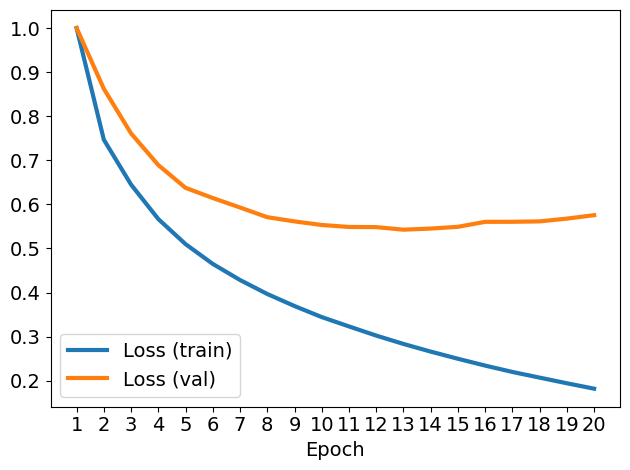

In [28]:
plot_training_results(losses, legend=['Loss (train)', 'Loss (val)'])

## Model Inference

### Auxiliary Methods

The code cell below implements to auxiliary methods for using our trained model for inference. The `greedy_decode()` function implements a simple greedy search strategy for generating a translation with a Transformer model. It begins by encoding the source sentence using the model's encoder, producing a hidden representation called *memory*. It then initializes the target sequence with a single token: the start-of-sentence symbol. At each decoding step, the method constructs a causal mask so the decoder can only attend to previously generated tokens, passes the current target sequence and the encoder's memory into the decoder, and computes a probability distribution over the next possible output token. Using **greedy search**, it selects the token with the **highest probability**, appends it to the sequence, and continues until either the maximum allowed length is reached or the model predicts an end-of-sentence token.

Secondly, the `translate()` function provides a user-facing interface that takes an input sentence in the source language and returns its translation in the target language. It first switches the model to evaluation mode, then transforms the input text into a tensor of token indices. It also builds the necessary source mask. The function then calls `greedy_decode()` to generate the output token sequence, using the start-of-sentence token as the initial decoder input. Finally, it maps the predicted token ids back into readable words using the target vocabulary and removes special tokens such as `<SOS>` and `<EOS>` to produce the final translated sentence. Together, these two methods implement the full inference pipeline for translation: preprocessing the input sentence, running it through the encoder–decoder architecture, generating the translated output token by token, and converting the result back into human-readable text.

In [29]:
# Method to generate output sequence using greedy algorithm
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    # Move everything to the correct device
    src = src.to(DEVICE)
    src_mask = src_mask.to(DEVICE)
    # Pass source batch to the encoder (memory = encoder output)
    memory = model.encode(src, src_mask)
    # Initialize the output sequence with the SOS token index
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len-1):
        memory = memory.to(DEVICE)
        # Generate causal mask for decoder
        tgt_mask = (generate_square_subsequent_mask(ys.size(1)).type(torch.bool)).to(DEVICE)
        # Pass current target sequence and memory to the decoder
        out = model.decode(ys, memory, tgt_mask)
        # Get the output for the last item in sequence (= next predicted word)
        prob = model.generator(out[:, -1])
        # Find the next most likely word based on highest probability
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()
        # Add next word to current target sequence
        ys = torch.cat([ys, torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=1)
        # If the predicted word is <EOS>, we can exit the loop
        if next_word == IDX_EOS:
            break
    return ys

# Actual method to translate input sentence into target language
def translate(model: torch.nn.Module, src_sentence: str):
    model.eval()
    # Convert the source text into the corresponding sequence of token indices
    src = text_transform(src_sentence.strip(), SRC_LANGUAGE).view(1, -1)
    num_tokens = src.shape[1]
    # Compute the required mask for the source sequence
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)
    # Generate the target sequence using greedy decoding
    tgt_tokens = greedy_decode(model, src, src_mask, max_len=num_tokens+5, start_symbol=IDX_SOS).flatten()
    # Replace the token ids with the actual tokens/words and remove all special tokens
    return " ".join(vocabulary[TGT_LANGUAGE].decode(list(tgt_tokens.cpu().numpy()))).replace("<SOS>", "").replace("<EOS>", "")

### Basic Tests

In principle, we could test the final model by evaluating it over the test data, using the `evaluate()` method as for the validation data. However, this would just give us some number (i.e., the loss) without any intuition how well the model is performing. We therefore look at $5$ randomly picked German captions from the test data and the translation done by the model. For each example caption we also add the correct translation taken from the test dataset. Keep in mind that, since we shuffle the batches, the training is non-deterministic, the outputs may differ between training sessions.

In [30]:
print(translate(model, "Eine Gruppe von Menschen steht vor einem Iglu ."))

 A group of people standing in front of an igloo . 


**Correct translation:** *"A group of people standing in front of an igloo ."*

In [31]:
print(translate(model, "Ein Koch posiert beim Kochen für die Kamera ."))

 A chef is posing for the camera while cooking . 


**Correct translation:** *"A cook is posing for a camera while cooking ."*

In [32]:
print(translate(model, "Ein Hund springt im Freien über ein Hindernis ."))

 A dog jumps over an outdoor obstacle . 


*"A dog jumps over an obstacle outside ."*

In [33]:
print(translate(model, "Zwei Männer unterhalten sich auf dem Gehsteig während ein Auto vorbeifährt ."))

 Two men are talking on the sidewalk while a car passes by . 


**Correct translation:** *"Two men stop to chat on the sidewalk as a car passes by ."*

In [34]:
print(translate(model, "Ein kleiner Junge steht neben einer Pyramide aus Sand ."))

 A young boy stands next to a pyramid . 


**Correct translation:** *"A young boy is standing next to a sand sculpture of a pyramid"*

Chances are that the translations done by the model are not perfectly correct; although they should be overall pretty decent in most cases. We might be able to get much better results by tuning different hyperparameters including the model size (e.g., number of attention heads, number of encoder/decoder layers), the batch size, the learning rate, and other parameters. However, our goal is not to train the best possible model but cover and explain all core steps to train a Transformer-based machine learning model. Of course, you are very welcome to change different hyperparameters in the notebook and re-train the model to see the effects on the results.

---

## Summary

In this notebook, we built a complete machine translation model based on the Transformer architecture using only PyTorch and fundamental Python tools. Although our experiments focused specifically on translating short image captions, the methods demonstrated here generalize naturally to a wide range of **sequence-to-sequence tasks**. Any task that maps an input sequence to an output sequence (e.g., summarization, question answering, dialogue generation, code generation, and more) can leverage the same encoder and decoder structure. With only minor modifications to preprocessing and dataset design, the architecture and training process explored in this notebook can be adapted to many different applications.

It is important to recognize, however, that real-world machine translation systems rely on **massive, highly diverse datasets** containing millions of sentence pairs. Training such models introduces additional challenges: efficient data loading and preprocessing, distributed training across multiple GPUs, careful regularization, and extensive hyperparameter tuning. Practical systems also incorporate techniques like beam search, subword tokenization (e.g., BPE or SentencePiece), sophisticated scheduling strategies, and mixed-precision training for speed and memory efficiency.

In contrast, the goal of this notebook was not to replicate production-level performance, but to **maximize clarity and learning**. By working with a small dataset and simplified pipeline, we were able to trace every detail of the model's forward pass, observe how gradients flow during training, and understand how the encoder and decoder collaborate to generate meaningful translations. These foundational insights provide a strong basis for exploring more advanced architectures, scaling techniques, and real-world applications in the future.